# 승과 다른 지표간 상관관계 분석

* WAR와 oWAR 이 두 지표는 승리와 강한 양의 상관관계를 보이고 이는 WAR과 oWAR가 선수의 전반적인 기여도를 평가하는 지표이기 때문에, 값이 높을수록 승리 가능성이 높아지는 것이 당연합니다.
* 득점과 타점은 팀의 공격 성과를 직접적으로 반영하므로, 값이 높을수록 승리할 가능성이 높습니다.
* 삼진은 승리와 강한 음의 상관관계를 가지고 있는데 이는 삼진을 많이 당하는 팀일수록 승리 확률이 낮아질 수 있음을 의미합니다.

win과 다른 칼럼 간의 상관관계:
WAR      0.807456
oWAR     0.794745
dWAR     0.347595
G        0.193770
PA       0.531212
ePA      0.499920
AB       0.333670
R        0.674421
H        0.578085
2B       0.376023
3B       0.348548
HR       0.340336
TB       0.586719
RBI      0.658676
SB       0.407083
CS       0.129830
BB       0.197310
HP       0.154607
IB       0.309427
SO      -0.496209
GDP     -0.096184
SH       0.143729
SF       0.376193
AVG      0.615515
OBP      0.643992
SLG      0.596052
OPS      0.645683
R/ePA    0.680781
wRC+     0.781167
Name: win, dtype: float64


/home/woojoo/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
/home/woojoo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


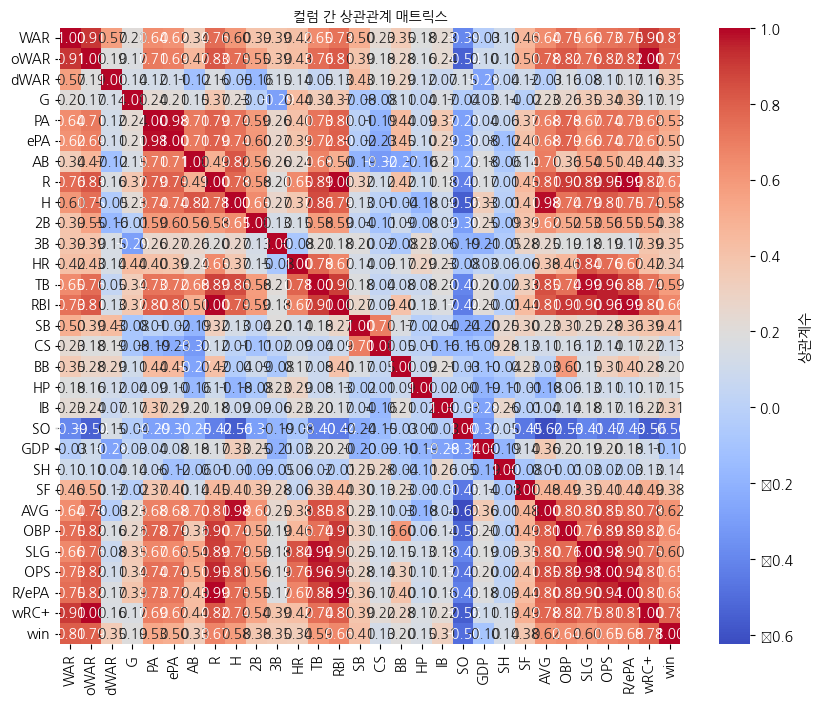

/home/woojoo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


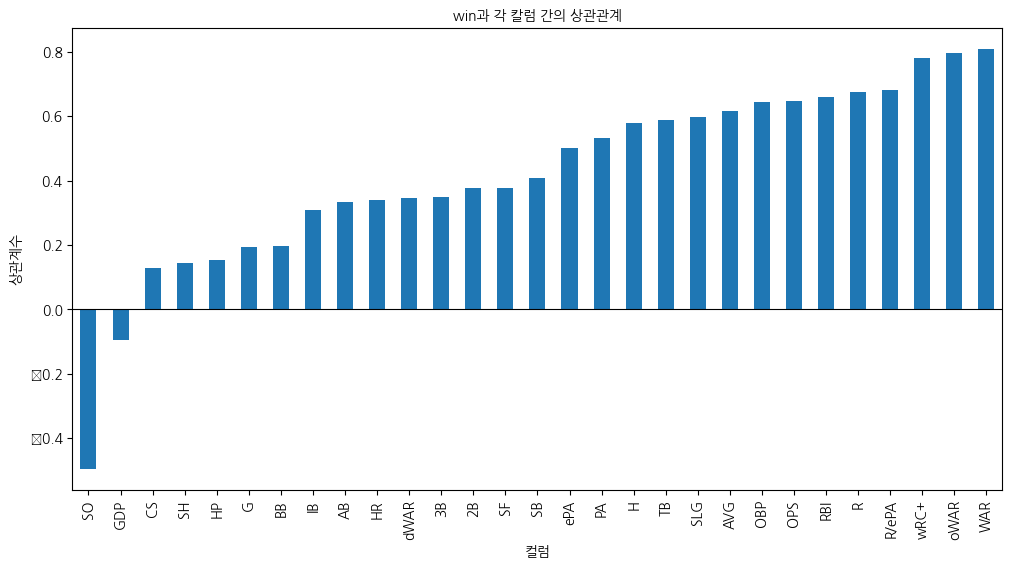

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 시스템에 설치된 NanumGothic 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# matplotlib에 폰트 등록
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# 상관관계 계산
correlation_matrix = df_batting_2019_2023.corr()

# win과 다른 칼럼들 간의 상관관계 추출
correlation_with_win = correlation_matrix['win'].drop('win')
print("win과 다른 칼럼 간의 상관관계:")
print(correlation_with_win)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10}, cbar_kws={'label': '상관계수'})
plt.title('컬럼 간 상관관계 매트릭스', fontproperties=fontprop)
plt.xticks(rotation=90, fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.show()

# win과 각 칼럼 간의 상관관계 시각화
correlation_with_win_sorted = correlation_with_win.sort_values()
plt.figure(figsize=(12, 6))
correlation_with_win_sorted.plot(kind='bar')
plt.title('win과 각 칼럼 간의 상관관계', fontproperties=fontprop)
plt.xlabel('컬럼', fontproperties=fontprop)
plt.ylabel('상관계수', fontproperties=fontprop)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=90, fontproperties=fontprop)
plt.show()



# SSG 올시즌 타격지표 비교

* 도루는 많고 홈런은 적은 경향을 보입니다.
* 전통적으로 SSG는 구장특성상 홈런이 많고 도루가 적은 빅볼 야구를 선호하는 경향이 있습니다.
* 나머지 타격지표들은 전부 중하위권으로 보여집니다.

/tmp/ipykernel_644/3146710550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_batting[column] = selected_columns_batting[column].astype(float)
/tmp/ipykernel_644/3146710550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_batting[column] = selected_columns_batting[column].astype(float)
/tmp/ipykernel_644/3146710550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

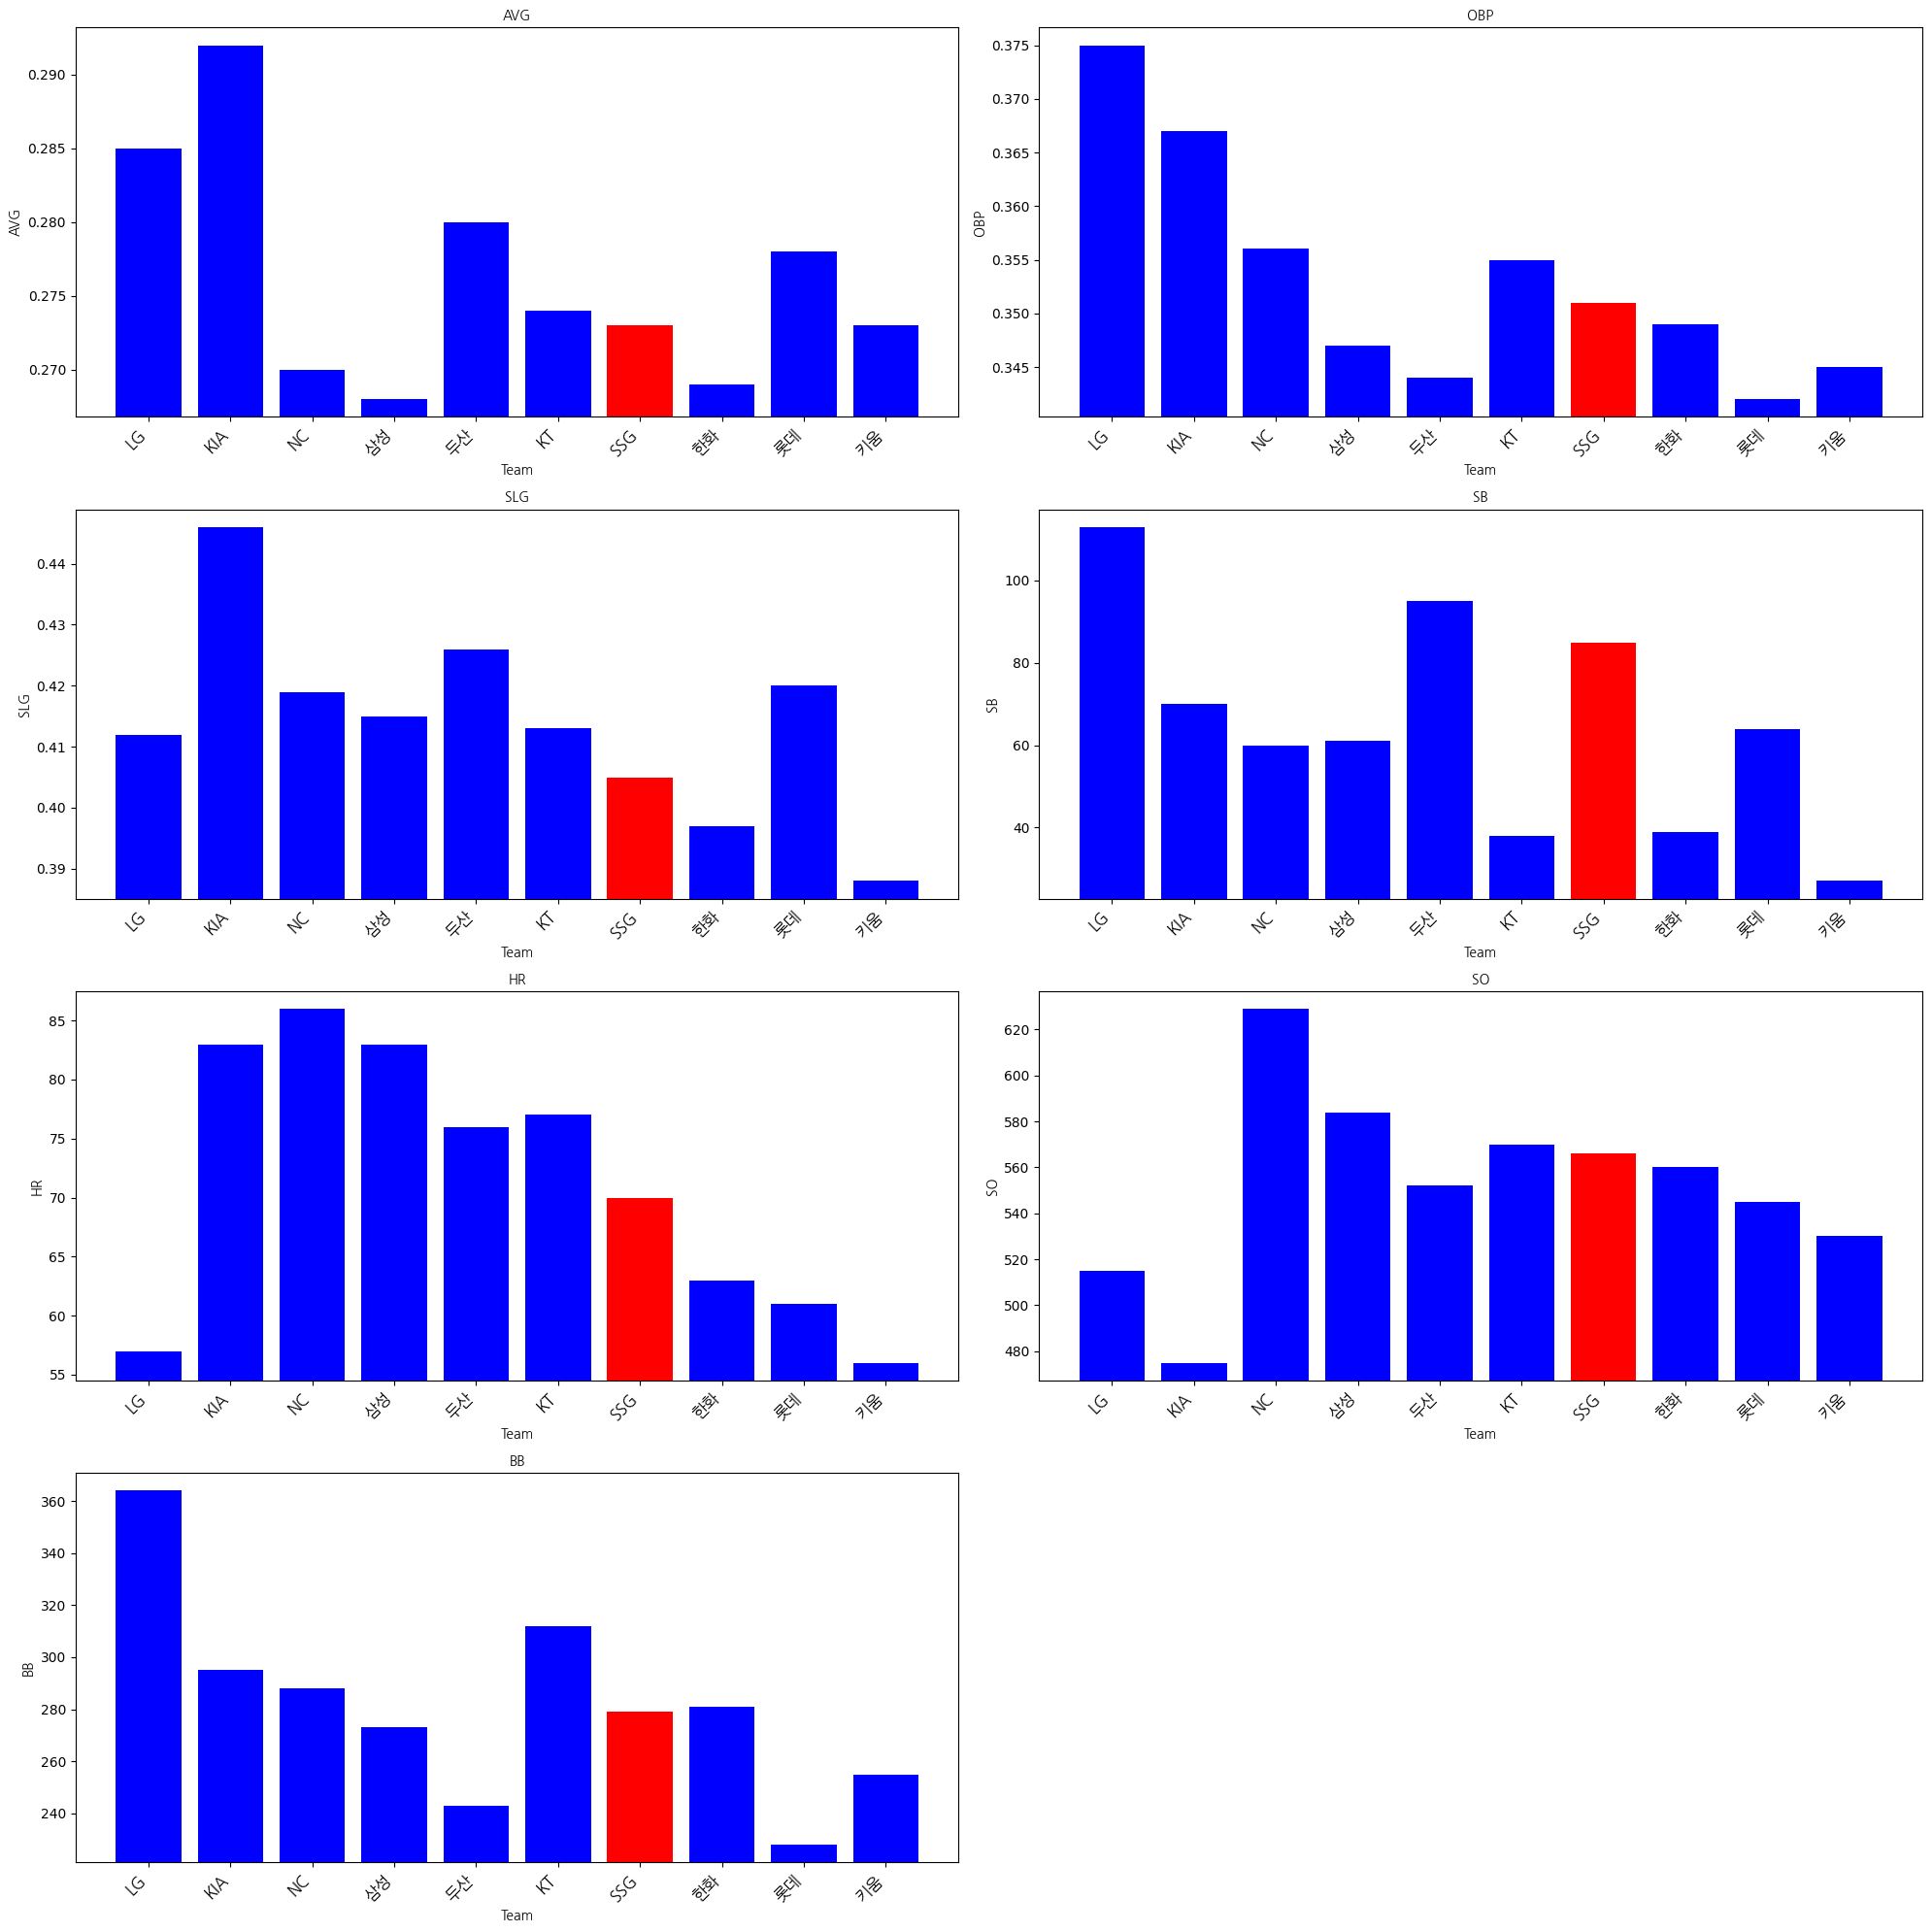

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로를 시스템에 맞게 설정
fontprop = fm.FontProperties(fname=font_path)

# 모든 관련 열을 float 타입으로 변환
for column in selected_columns_batting.columns[1:]:
    selected_columns_batting[column] = selected_columns_batting[column].astype(float)

# 서브플롯에 필요한 행 수 계산
num_cols = 2
num_rows = (len(selected_columns_batting.columns) - 1 + num_cols - 1) // num_cols  # 'Team' 열 제외

# 각 열을 별도의 서브플롯에 그리기
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
columns = selected_columns_batting.columns[1:]  # 'Team' 열 제외

for ax, column in zip(axes.flatten(), columns):
    colors = ['red' if team == 'SSG' else 'blue' for team in selected_columns_batting['Team']]
    ax.bar(selected_columns_batting['Team'], selected_columns_batting[column], color=colors)
    ax.set_title(column, fontproperties=fontprop)
    ax.set_xlabel('Team', fontproperties=fontprop)
    ax.set_ylabel(column, fontproperties=fontprop)
    ax.set_xticklabels(selected_columns_batting['Team'], rotation=45, ha='right', fontproperties=fontprop)
    ax.tick_params(axis='x', labelsize=12)  # 읽기 쉽게 x축 레이블 크기 증가
    # 더 나은 비교를 위해 y축 범위 설정
    ax.set_ylim([selected_columns_batting[column].min() - 0.05 * (selected_columns_batting[column].max() - selected_columns_batting[column].min()), 
                 selected_columns_batting[column].max() + 0.05 * (selected_columns_batting[column].max() - selected_columns_batting[column].min())])

# 빈 서브플롯 제거
for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



# 최근 5년간 팀별 홈런과 도루 수

* 홈런: 2019년과 2020년에는 중상위권에 있었으나, 2021년, 2022년, 2023년 시즌에는 가장 많은 홈런을 기록한 팀으로 나타납니다.
* 도루: 2019년에는 도루가 가장 많았지만, 이후 시즌에서는 중위권에서 중상위권 사이를 오갔습니다.
* 올해 경향: 올해는 과거와 달리 홈런 수가 급감하고 도루는 약간 증가한 경향을 보이고 있습니다.

/tmp/ipykernel_655/530686514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teamyear_hr['Year'] = df_teamyear_hr['Year'].astype(int)
/tmp/ipykernel_655/530686514.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teamyear_hr['HR'] = df_teamyear_hr['HR'].astype(int)
/tmp/ipykernel_655/530686514.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Team    object
Year     int64
HR       int64
dtype: object


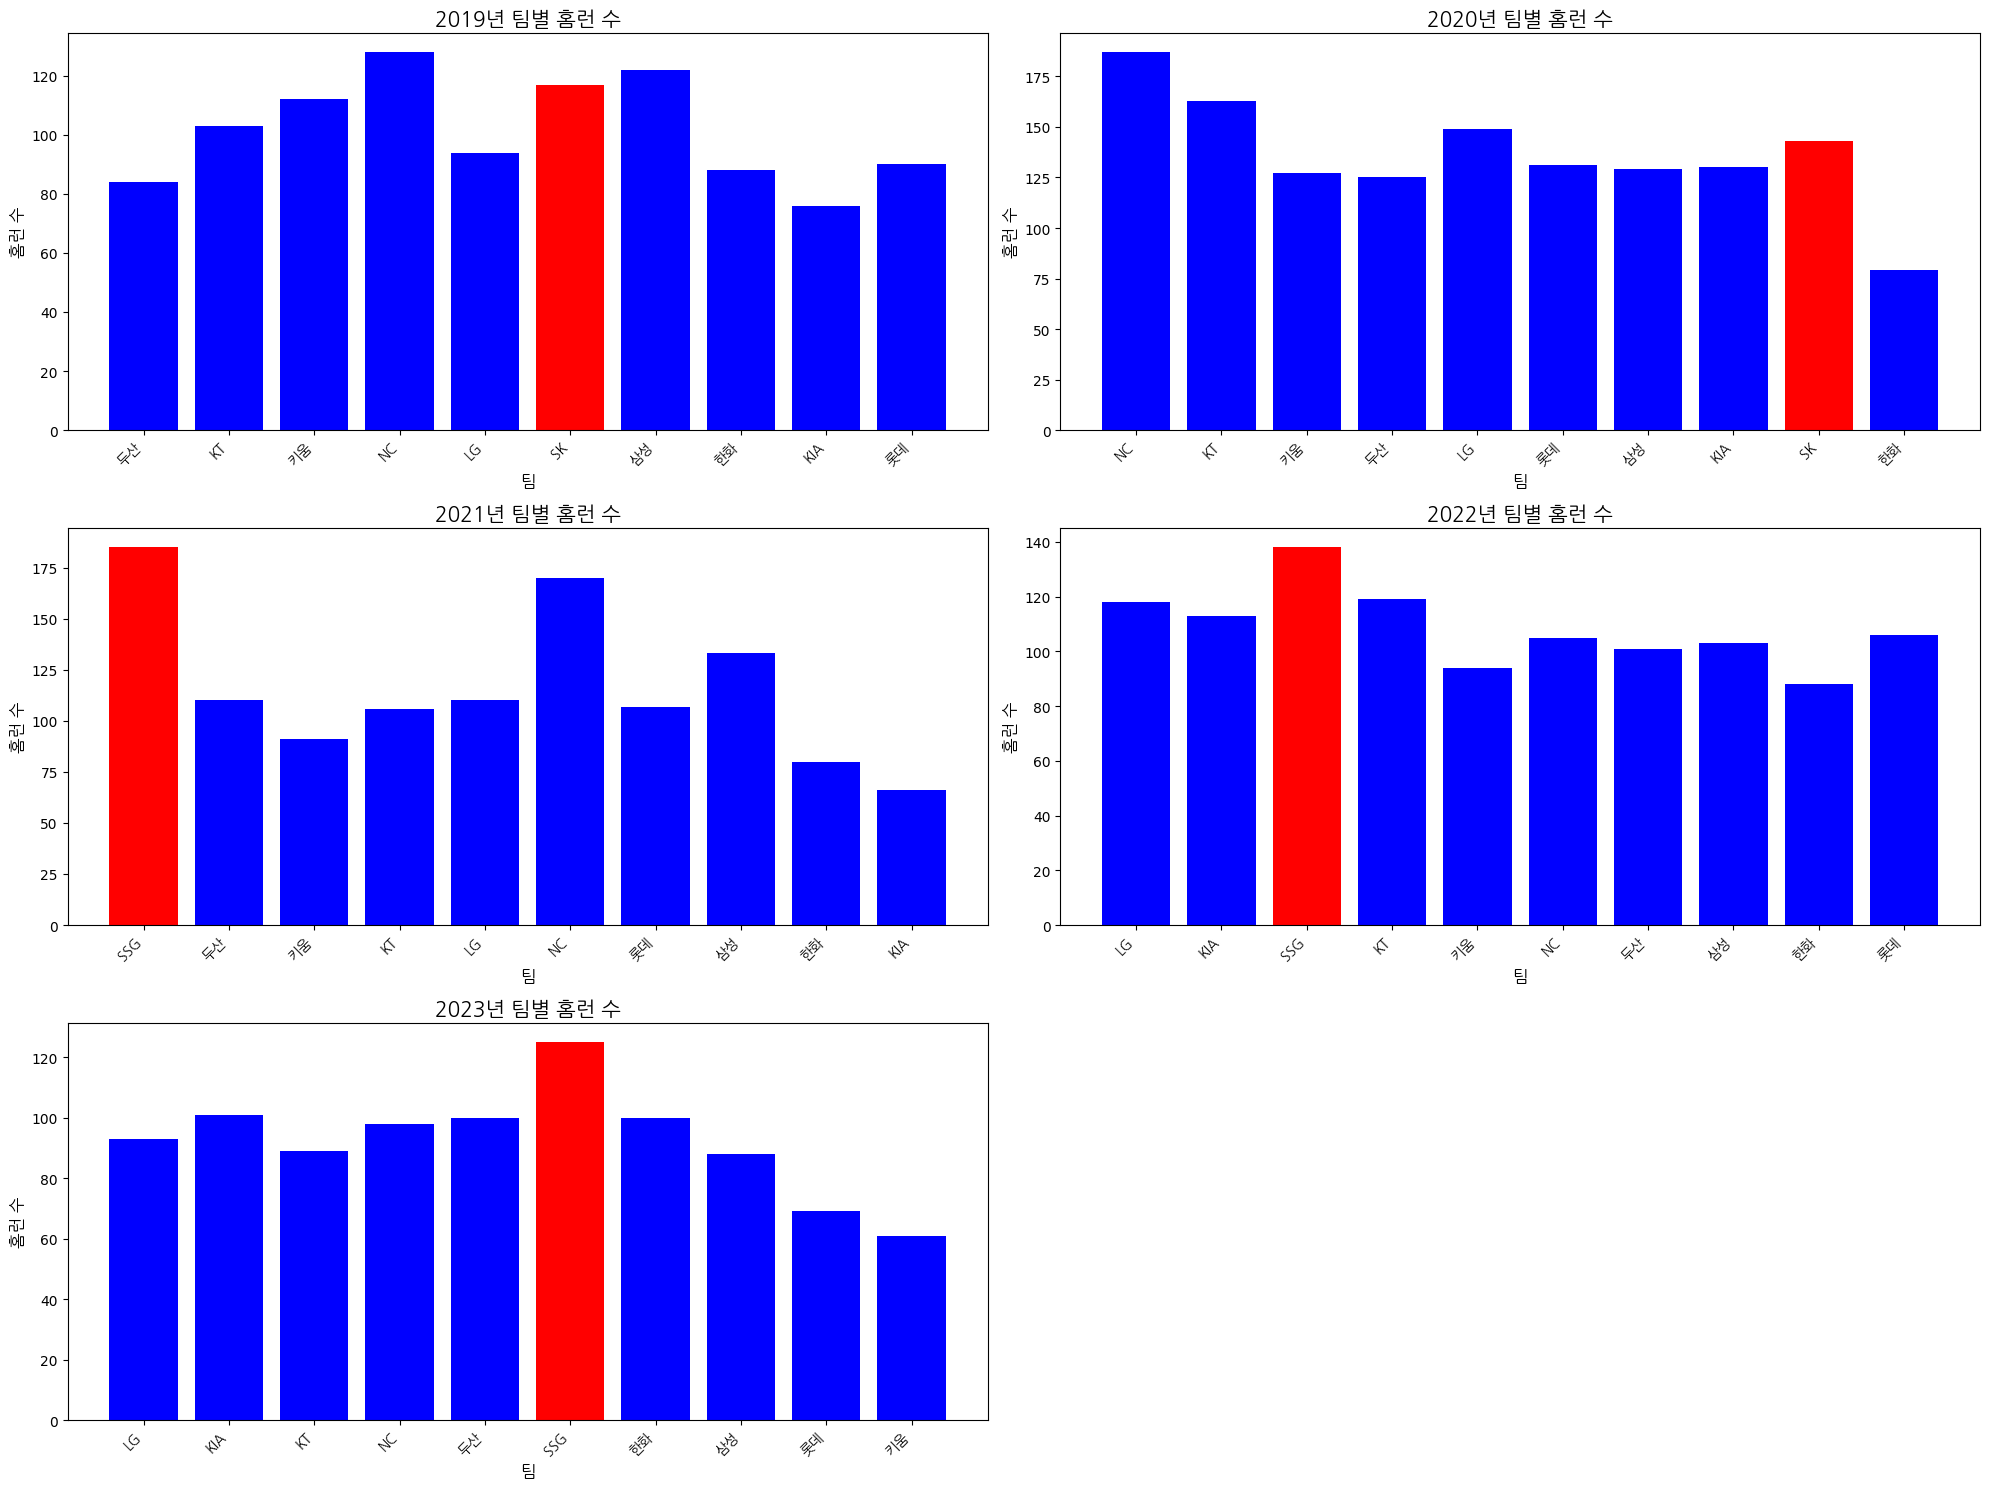

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 데이터 타입 변환
df_teamyear_hr['Year'] = df_teamyear_hr['Year'].astype(int)
df_teamyear_hr['HR'] = df_teamyear_hr['HR'].astype(int)

# 데이터 타입 확인
print(df_teamyear_hr.dtypes)

# 연도별로 데이터 그룹화
df_teamyear_hr['Year'] = df_teamyear_hr['Year'].astype(str)
grouped = df_teamyear_hr.groupby('Year')

# 서브플롯 개수 계산
num_years = df_teamyear_hr['Year'].nunique()
num_cols = 2
num_rows = (num_years + num_cols - 1) // num_cols

# 서브플롯 생성
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# 각 연도별 서브플롯에 데이터 그리기
for (year, group), ax in zip(grouped, axes.flatten()):
    colors = ['red' if team == 'SSG' or (team == 'SK' and int(year) <= 2020) else 'blue' for team in group['Team']]
    ax.bar(group['Team'], group['HR'], color=colors)
    ax.set_title(f'{year}년 팀별 홈런 수', fontproperties=fontprop, fontsize=15)
    ax.set_xlabel('팀', fontproperties=fontprop, fontsize=12)
    ax.set_ylabel('홈런 수', fontproperties=fontprop, fontsize=12)
    ax.set_xticklabels(group['Team'], rotation=45, ha='right', fontproperties=fontprop)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# 나머지 빈 서브플롯 제거
for i in range(num_years, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Team    object
Year     int64
SB      object
dtype: object
Team    object
Year     int64
SB       int64
dtype: object


/tmp/ipykernel_655/3763779344.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teamyear_SB['Year'] = df_teamyear_SB['Year'].astype(int)
/tmp/ipykernel_655/3763779344.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teamyear_SB['SB'] = df_teamyear_SB['SB'].astype(int)
/tmp/ipykernel_655/3763779344.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

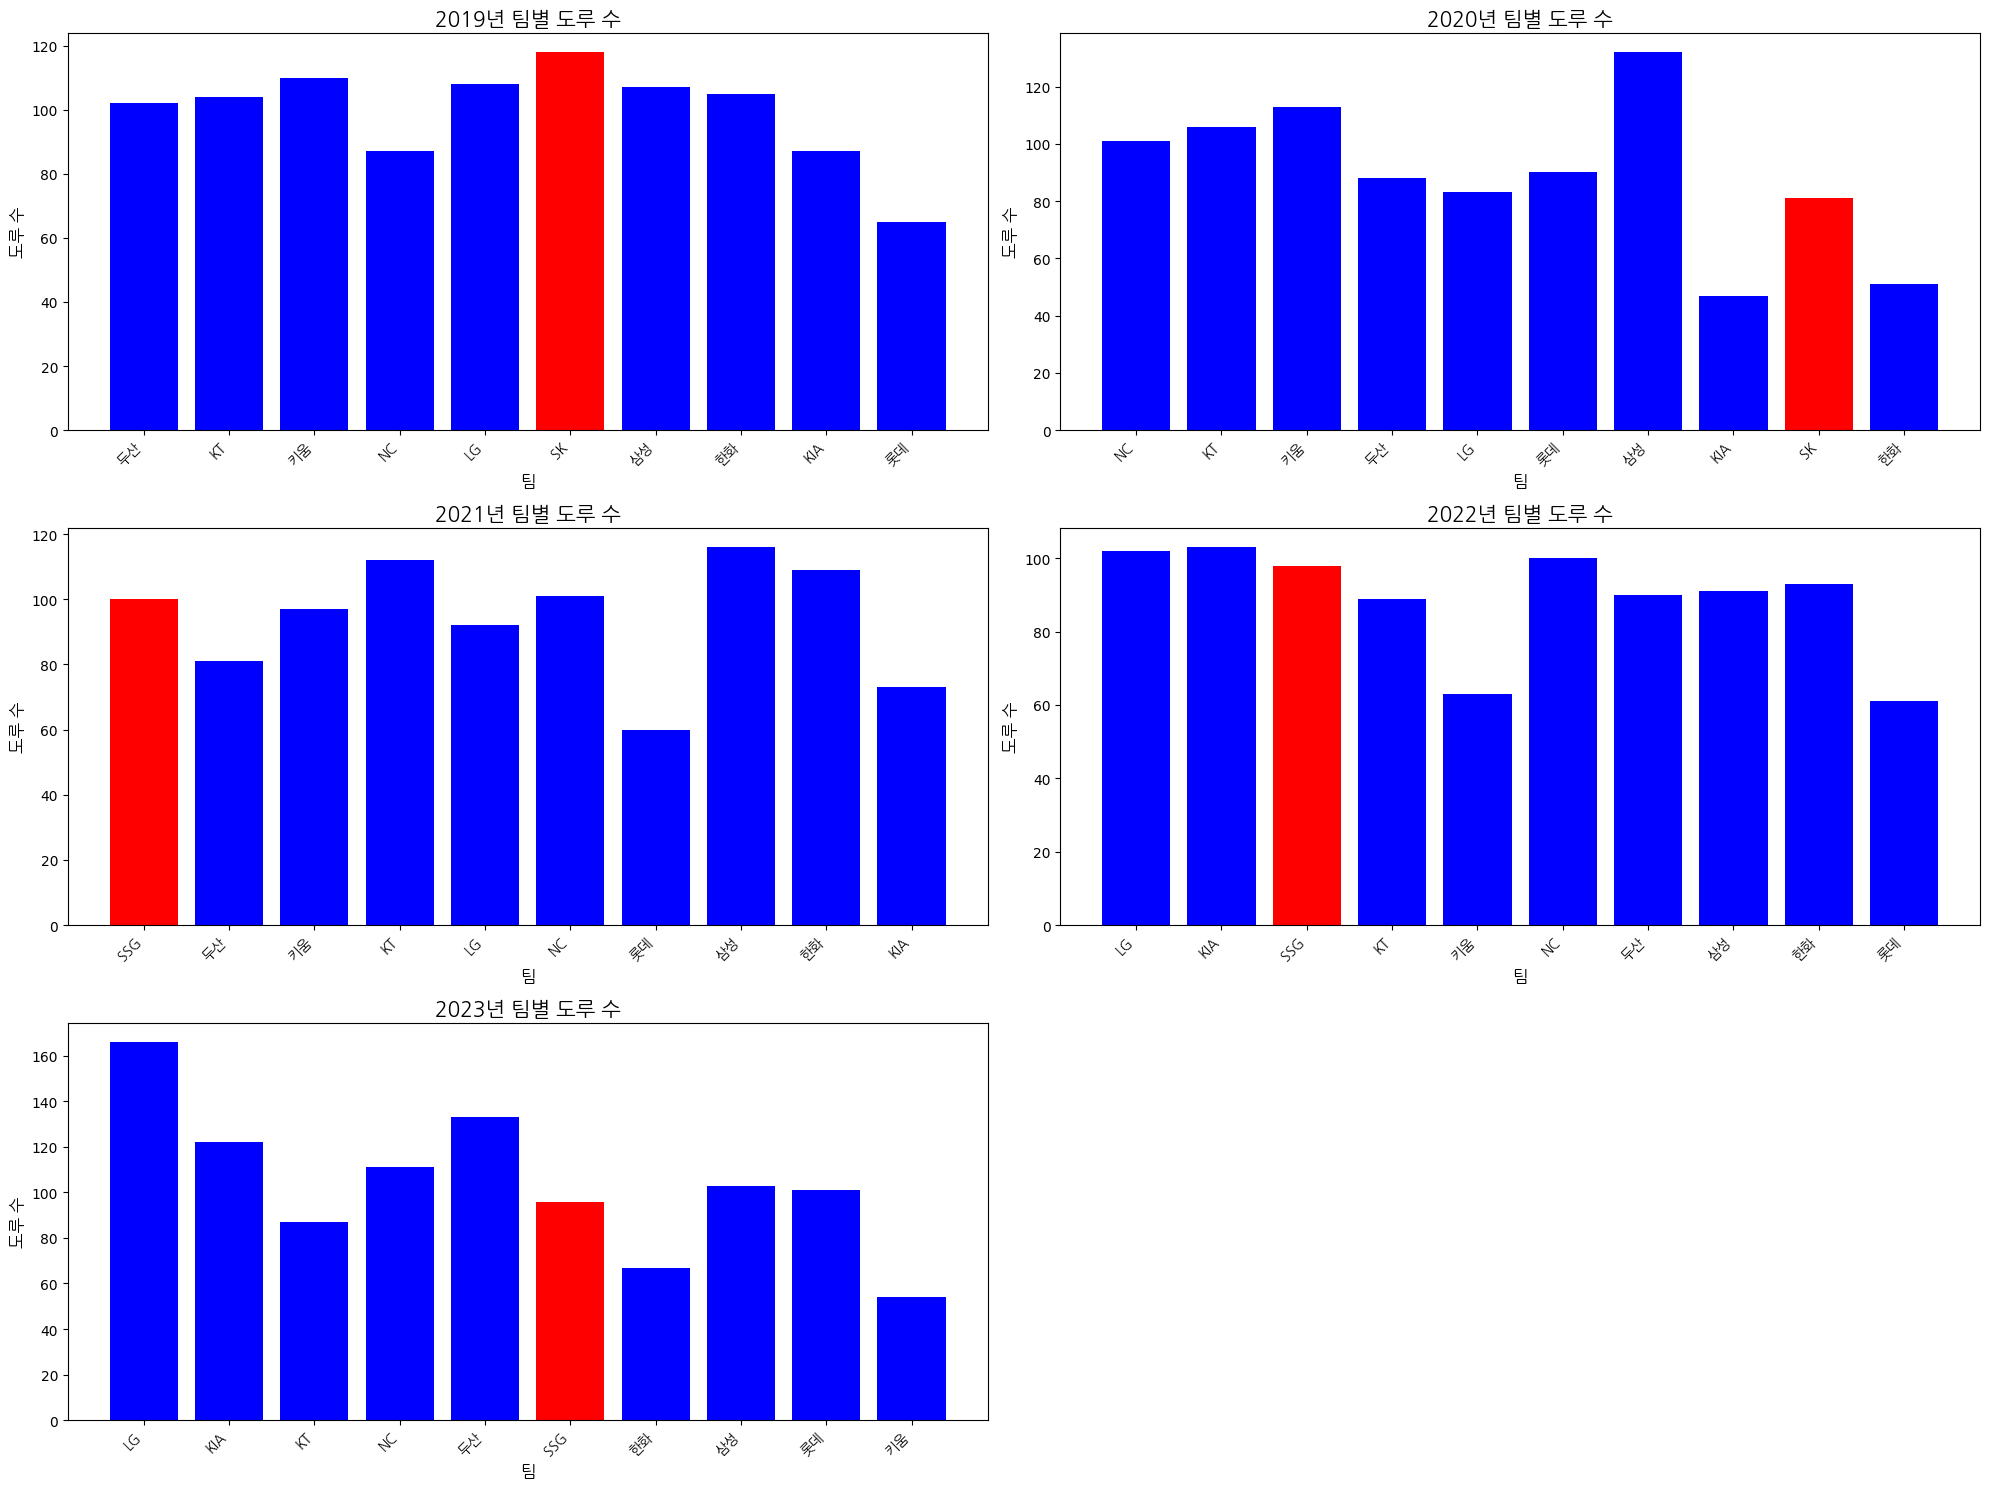

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 필요하다면 데이터프레임을 파일에서 불러오기
# df_batting_2019_2023 = pd.read_csv('/path/to/your/file.csv')

# 원하는 컬럼만 선택하여 새로운 데이터프레임 생성
df_teamyear_SB = df_batting_2019_2023[['Team', 'Year', 'SB']]

# 데이터 타입 확인
print(df_teamyear_SB.dtypes)

# 데이터 타입 변환
df_teamyear_SB['Year'] = df_teamyear_SB['Year'].astype(int)
df_teamyear_SB['SB'] = df_teamyear_SB['SB'].astype(int)

# 데이터 타입 확인 후 변환된 타입 출력
print(df_teamyear_SB.dtypes)

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 연도별로 데이터 그룹화
df_teamyear_SB['Year'] = df_teamyear_SB['Year'].astype(str)
grouped = df_teamyear_SB.groupby('Year')

# 서브플롯 개수 계산
num_years = df_teamyear_SB['Year'].nunique()
num_cols = 2
num_rows = (num_years + num_cols - 1) // num_cols

# 서브플롯 생성
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# 각 연도별 서브플롯에 데이터 그리기
for (year, group), ax in zip(grouped, axes.flatten()):
    colors = ['red' if team == 'SSG' or (team == 'SK' and int(year) <= 2020) else 'blue' for team in group['Team']]
    ax.bar(group['Team'], group['SB'], color=colors)
    ax.set_title(f'{year}년 팀별 도루 수', fontproperties=fontprop, fontsize=15)
    ax.set_xlabel('팀', fontproperties=fontprop, fontsize=12)
    ax.set_ylabel('도루 수', fontproperties=fontprop, fontsize=12)
    ax.set_xticklabels(group['Team'], rotation=45, ha='right', fontproperties=fontprop)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# 나머지 빈 서브플롯 제거
for i in range(num_years, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


# 득점권 상황 타격 지표

* 타격의 모든 지표가 중하위권임에도 불구하고 상위권 순위 경쟁을 하는 이유는 무엇일까?
* 득점권 상황에서의 타격을 살펴본 결과, 타율과 출루율은 낮았지만 장타율이 높은 것이 그 이유인 것 같다.
* 즉, 득점권에 주자가 있을 때 장타를 통해 한 번에 많은 점수를 올리는 능력이 좋다는 것을 보여준다.

/tmp/ipykernel_655/1539449416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_clutch[column] = selected_columns_clutch[column].astype(float)
/tmp/ipykernel_655/1539449416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_clutch[column] = selected_columns_clutch[column].astype(float)
/tmp/ipykernel_655/1539449416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



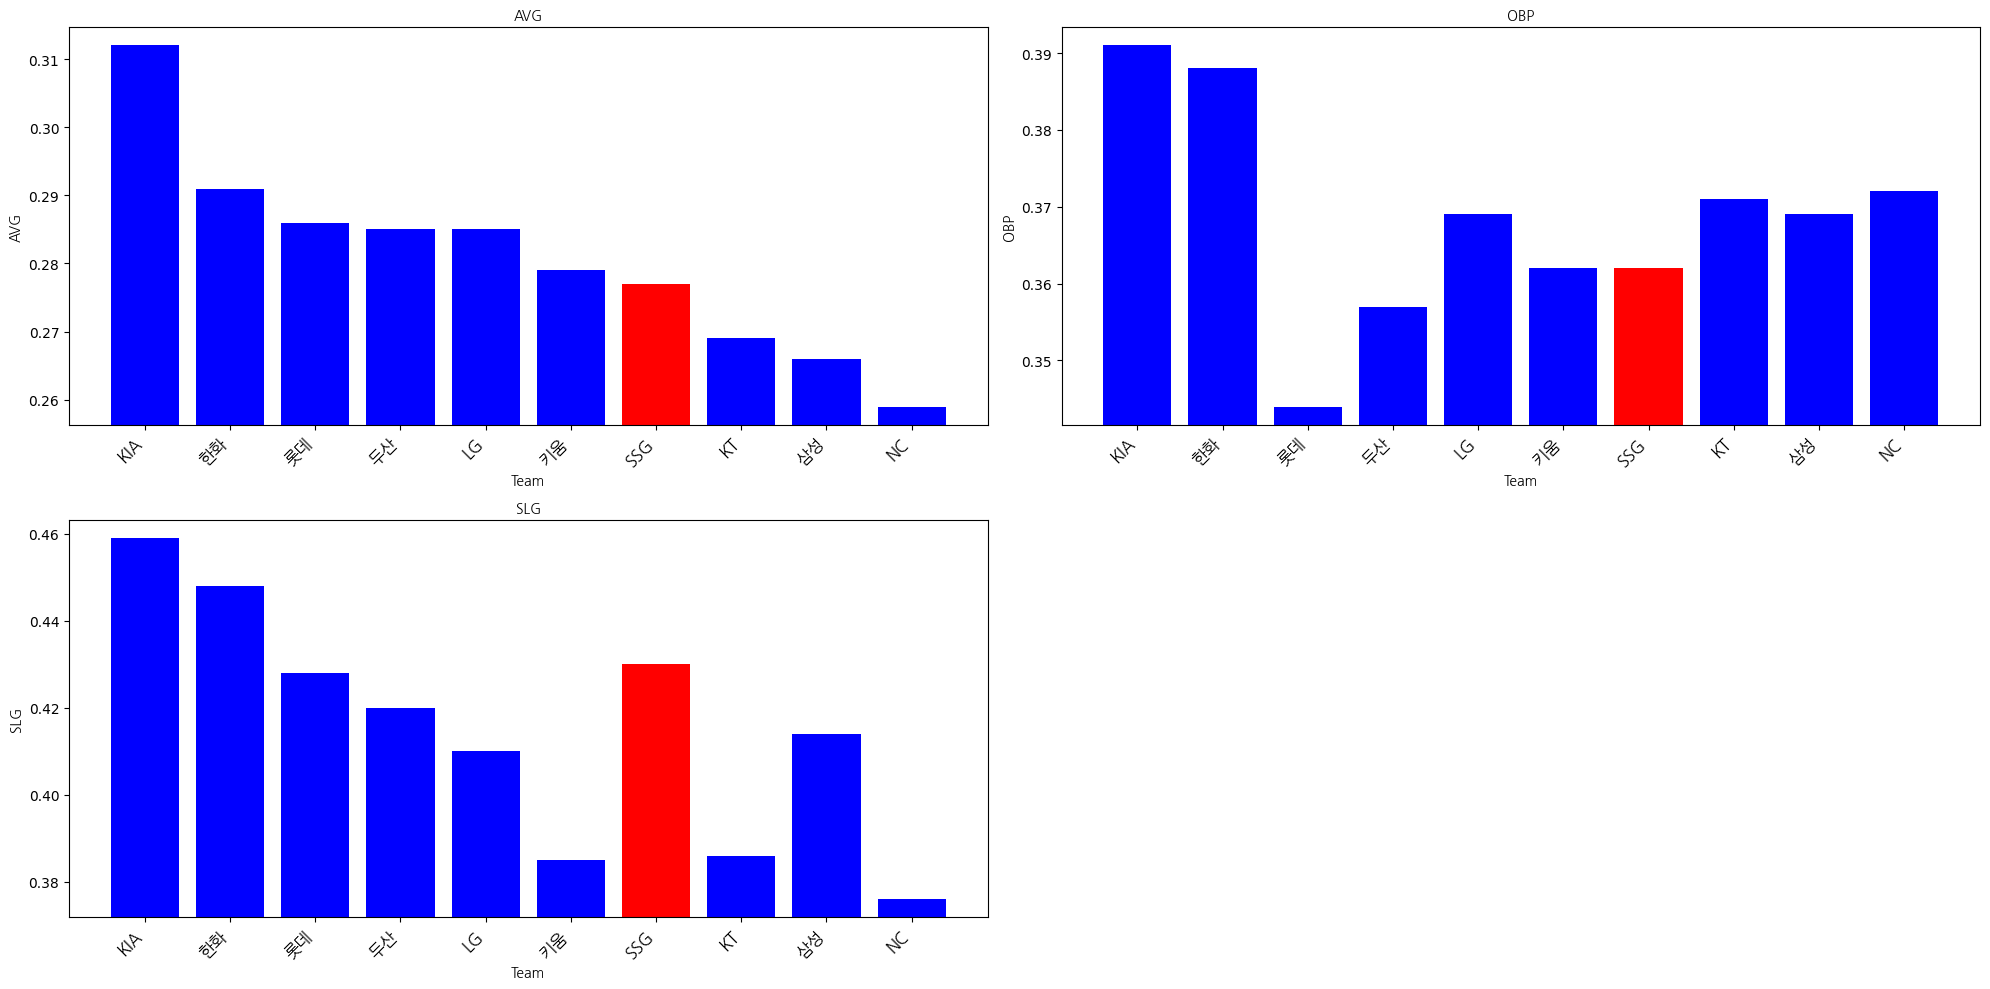

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로를 시스템에 맞게 설정
fontprop = fm.FontProperties(fname=font_path)

for column in selected_columns_clutch.columns[1:]:
    selected_columns_clutch[column] = selected_columns_clutch[column].astype(float)

num_cols = 2
num_rows = (len(selected_columns_clutch.columns) - 1 + num_cols - 1) // num_cols  # Exclude 'Team' column

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
columns = selected_columns_clutch.columns[1:]  

for ax, column in zip(axes.flatten(), columns):
    colors = ['red' if team == 'SSG' else 'blue' for team in selected_columns_clutch['Team']]
    ax.bar(selected_columns_clutch['Team'], selected_columns_clutch[column], color=colors)
    ax.set_title(column, fontproperties=fontprop)
    ax.set_xlabel('Team', fontproperties=fontprop)
    ax.set_ylabel(column, fontproperties=fontprop)
    ax.set_xticklabels(selected_columns_clutch['Team'], rotation=45, ha='right', fontproperties=fontprop)
    ax.tick_params(axis='x', labelsize=12)  
    ax.set_ylim([selected_columns_clutch[column].min() - 0.05 * (selected_columns_clutch[column].max() - selected_columns_clutch[column].min()), 
                 selected_columns_clutch[column].max() + 0.05 * (selected_columns_clutch[column].max() - selected_columns_clutch[column].min())])

for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


# 타자 FA

* 득점권에서 클러치 히터들이 충분히 있으므로, 출루를 통해 득점권 상황을 만들 수 있는 타자가 필요하다고 생각됩니다.
* 출루율을 살펴본 결과, 류지혁 선수의 평균 출루율이 가장 높았지만, 팀 전체 출루율과 큰 차이가 없는 것으로 나타났습니다.
* 다른 타자들의 스탯도 전반적으로 낮아, 타자에서의 추가 영입이 필요하지 않아 보입니다.

/tmp/ipykernel_644/704296541.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(avg_stats['name'], rotation=45, ha='right')
/tmp/ipykernel_644/704296541.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(avg_stats['name'], rotation=45, ha='right')
/tmp/ipykernel_644/704296541.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(avg_stats['name'], rotation=45, ha='right')
/tmp/ipykernel_644/704296541.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(avg_stats['name'], rotation=45, ha='right')


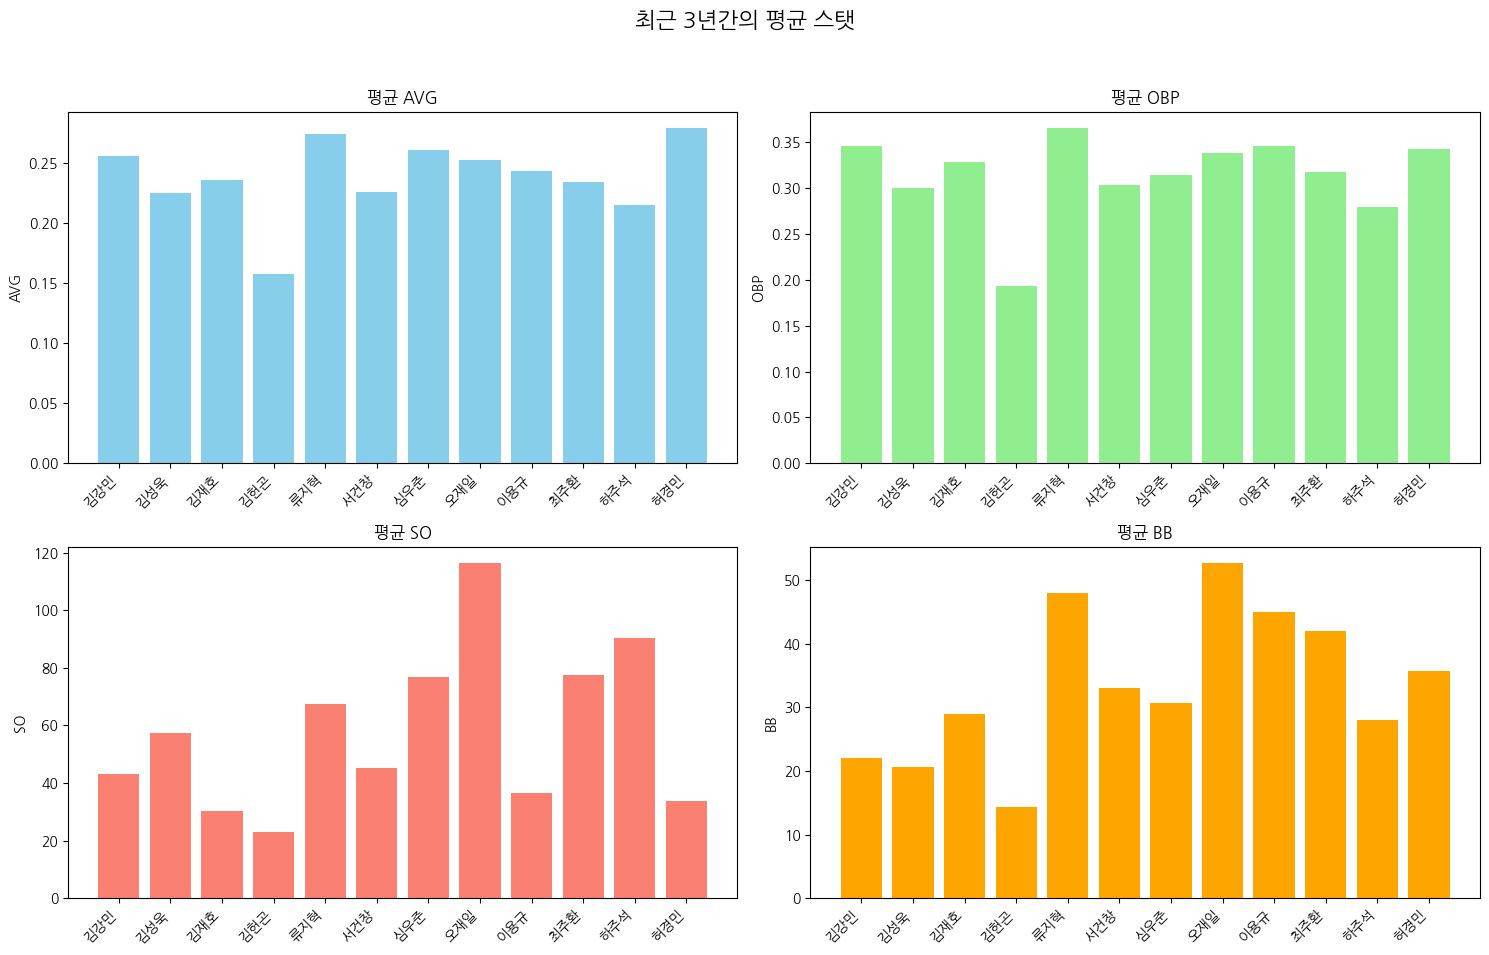

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# NanumGothic 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
mpl.rc('font', family='NanumGothic')

# 각 열의 데이터 타입을 float로 변환
df_FA_HITTER['AVG'] = df_FA_HITTER['AVG'].astype(float)
df_FA_HITTER['OBP'] = df_FA_HITTER['OBP'].astype(float)
df_FA_HITTER['SO'] = df_FA_HITTER['SO'].astype(float)
df_FA_HITTER['BB'] = df_FA_HITTER['BB'].astype(float)

# 각 이름별로 AVG, OBP, SO, BB의 평균을 계산
avg_stats = df_FA_HITTER.groupby('name')[['AVG', 'OBP', 'SO', 'BB']].mean().reset_index()

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('최근 3년간의 평균 스탯', fontsize=16)

# AVG 평균 시각화
axes[0, 0].bar(avg_stats['name'], avg_stats['AVG'], color='skyblue')
axes[0, 0].set_title('평균 AVG')
axes[0, 0].set_ylabel('AVG')
axes[0, 0].set_xticklabels(avg_stats['name'], rotation=45, ha='right')

# OBP 평균 시각화
axes[0, 1].bar(avg_stats['name'], avg_stats['OBP'], color='lightgreen')
axes[0, 1].set_title('평균 OBP')
axes[0, 1].set_ylabel('OBP')
axes[0, 1].set_xticklabels(avg_stats['name'], rotation=45, ha='right')

# SO 평균 시각화
axes[1, 0].bar(avg_stats['name'], avg_stats['SO'], color='salmon')
axes[1, 0].set_title('평균 SO')
axes[1, 0].set_ylabel('SO')
axes[1, 0].set_xticklabels(avg_stats['name'], rotation=45, ha='right')

# BB 평균 시각화
axes[1, 1].bar(avg_stats['name'], avg_stats['BB'], color='orange')
axes[1, 1].set_title('평균 BB')
axes[1, 1].set_ylabel('BB')
axes[1, 1].set_xticklabels(avg_stats['name'], rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# SSG 올시즌 투구 지표

## 선발

* 지표를 분석한 결과, 모든 부분에서 SSG가 최하위를 기록하고 있습니다.
* 선발 투수의 안정성과 효율성을 평가하는 QS(퀄리티 스타트)는 큰 격차로 최하위를 기록하고 있으며, QS+는 0회로 나타났습니다.
* 또한 이닝수는 가장 적은데, ERA는 가장 높게 나타납니다.
* 이러한 상황을 종합해 볼 때, 제대로 선발 역할을 하는 선수가 없는 수준으로 판단됩니다.

/tmp/ipykernel_644/3287120886.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_pitching_starting[column] = selected_columns_pitching_starting[column].astype(float)
/tmp/ipykernel_644/3287120886.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_pitching_starting[column] = selected_columns_pitching_starting[column].astype(float)
/tmp/ipykernel_644/3287120886.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

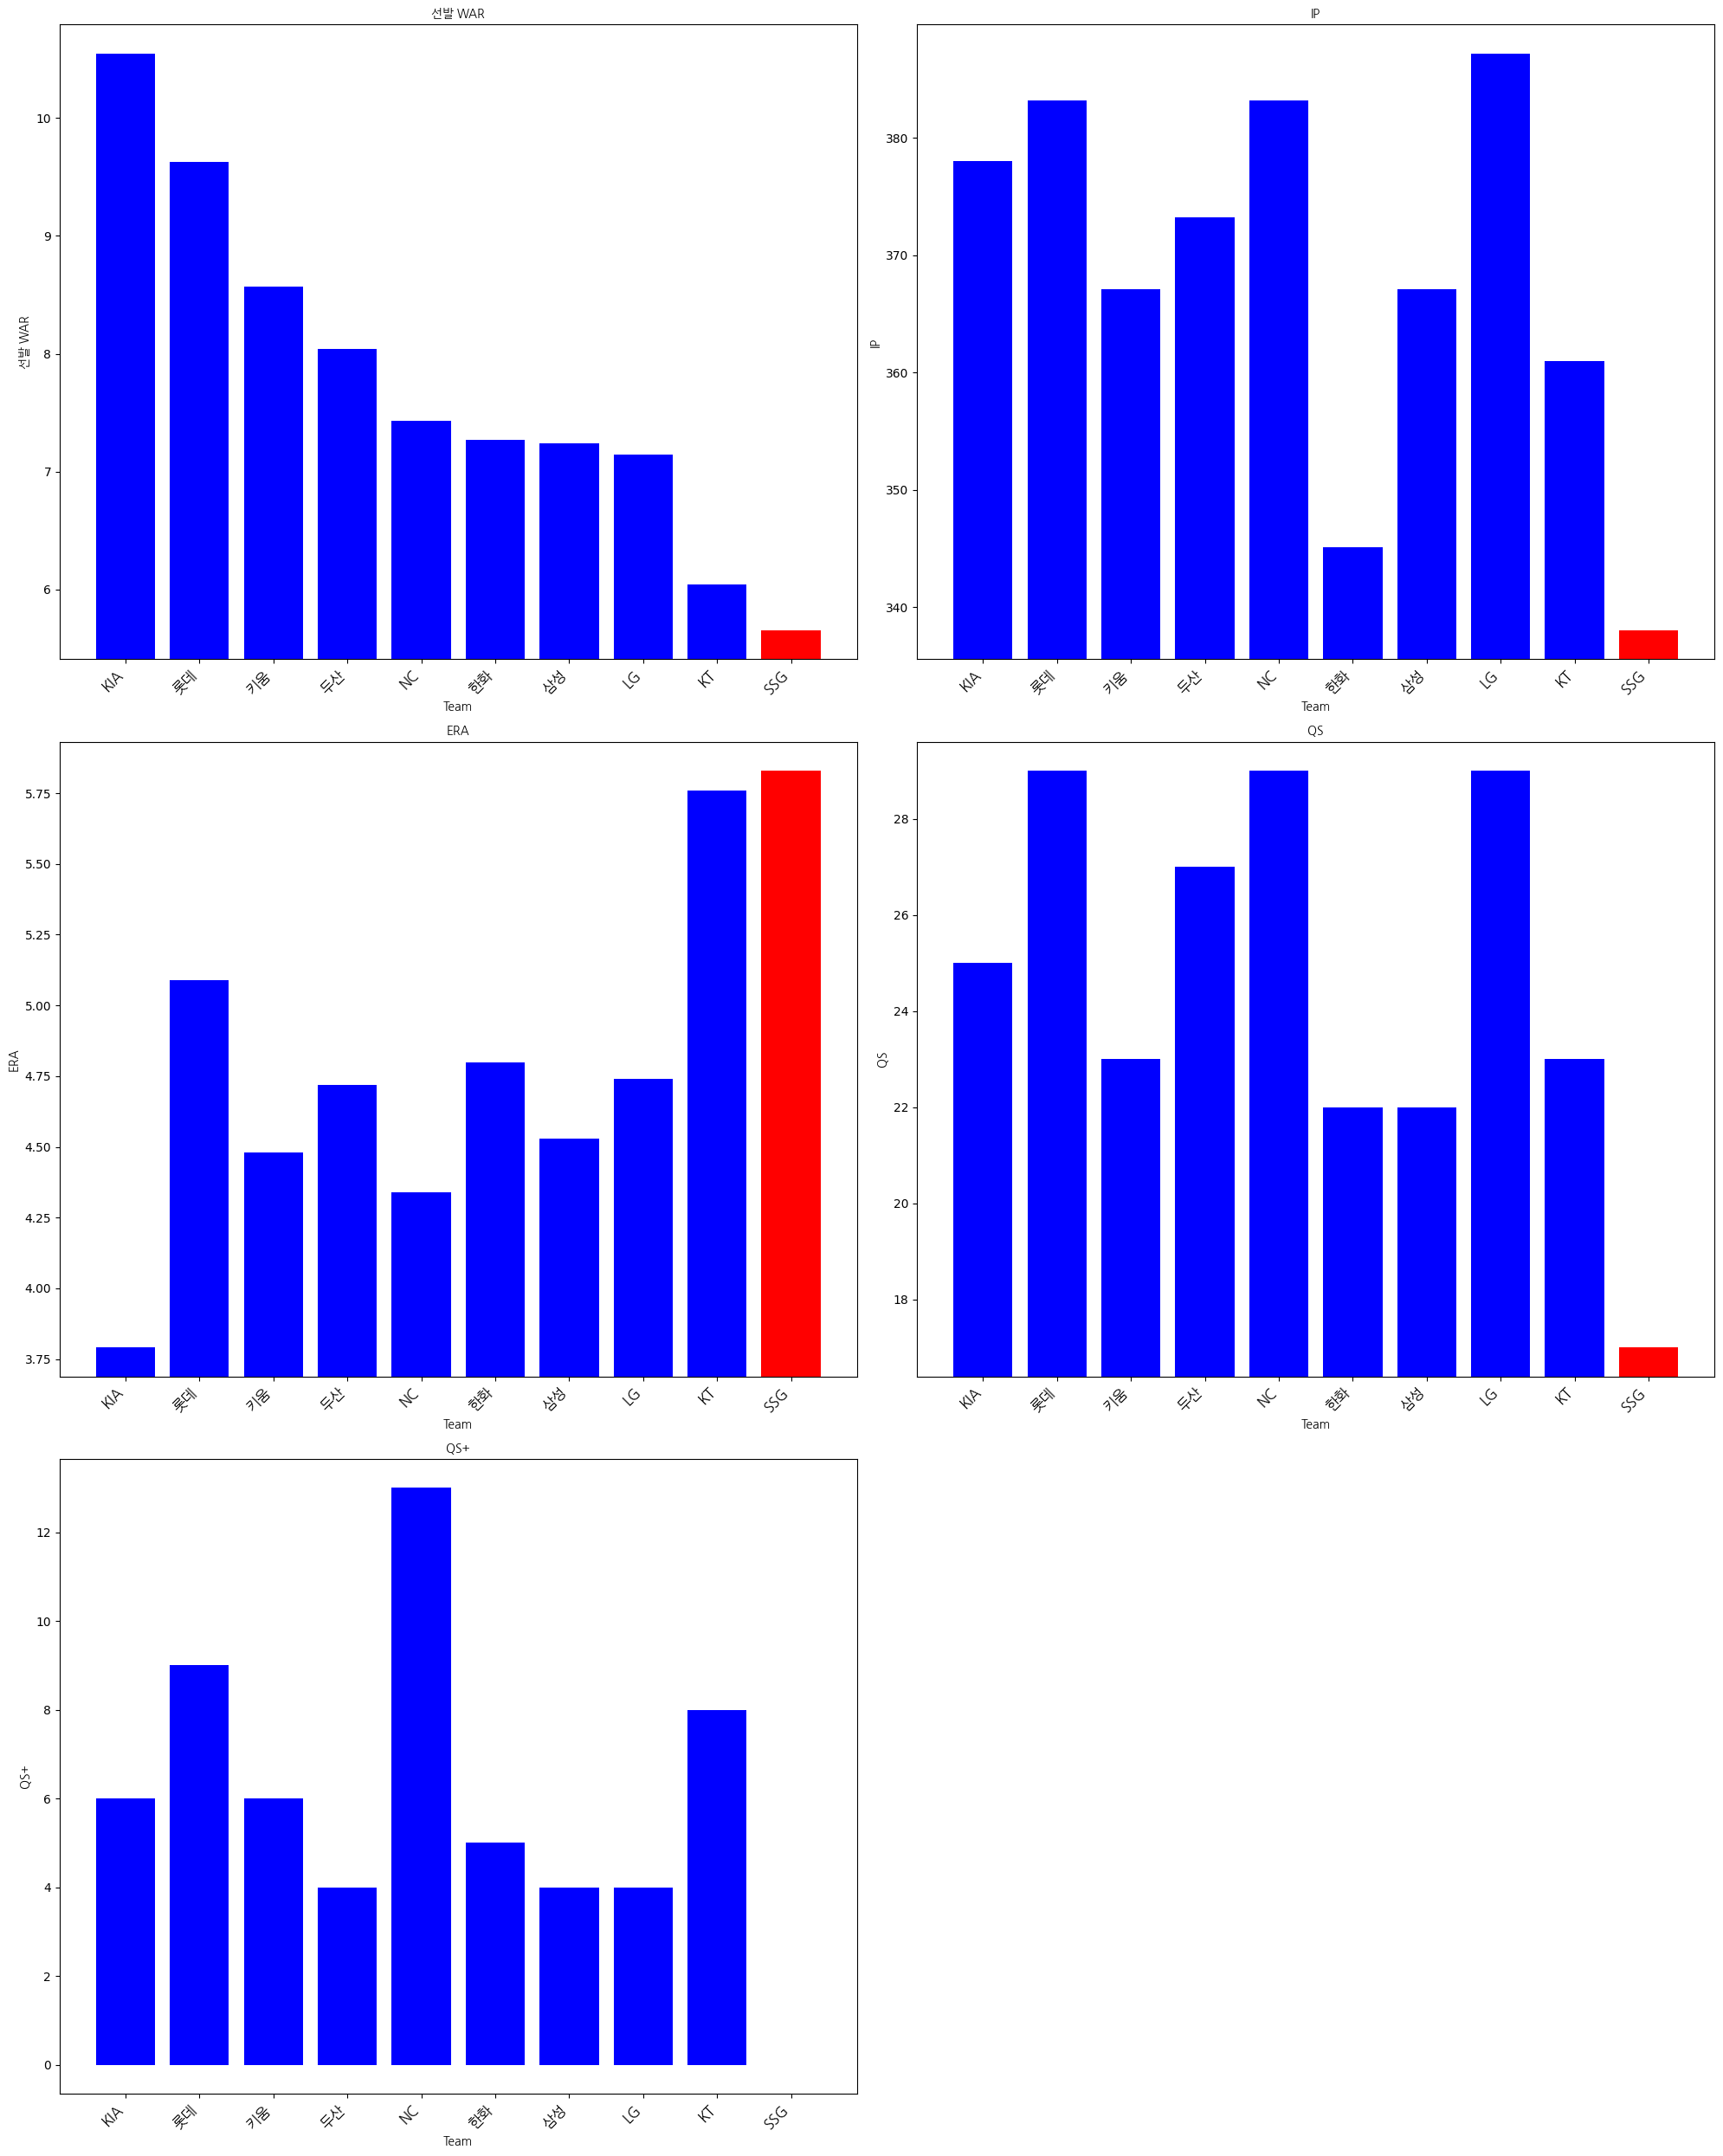

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로를 시스템에 맞게 설정
fontprop = fm.FontProperties(fname=font_path)

# Ensure all relevant columns are of type float
for column in selected_columns_pitching_starting.columns[1:]:
    selected_columns_pitching_starting[column] = selected_columns_pitching_starting[column].astype(float)

# Plotting each column in a separate subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
columns = selected_columns_pitching_starting.columns[1:]  # Exclude the 'Team' column

for ax, column in zip(axes.flatten(), columns):
    colors = ['red' if team == 'SSG' else 'blue' for team in selected_columns_pitching_starting['Team']]
    ax.bar(selected_columns_pitching_starting['Team'], selected_columns_pitching_starting[column], color=colors)
    ax.set_title(column, fontproperties=fontprop)
    ax.set_xlabel('Team', fontproperties=fontprop)
    ax.set_ylabel(column, fontproperties=fontprop)
    ax.set_xticklabels(selected_columns_pitching_starting['Team'], rotation=45, ha='right', fontproperties=fontprop)
    ax.tick_params(axis='x', labelsize=12)  # Increase x-axis label size for readability
    # Set y-axis limit for better comparison
    ax.set_ylim([selected_columns_pitching_starting[column].min() - 0.05 * (selected_columns_pitching_starting[column].max() - selected_columns_pitching_starting[column].min()), 
                 selected_columns_pitching_starting[column].max() + 0.05 * (selected_columns_pitching_starting[column].max() - selected_columns_pitching_starting[column].min())])

# Remove the last empty subplot if there is any
if len(columns) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

## 구원

* WAR이 두 번째로 높고 ERA는 두 번째로 낮게 나오는 것으로 보아, 매우 좋은 역할을 해주고 있는 투수도 있습니다.
* 이닝 수가 두 번째로 높은 것을 보아 선발 투수들이 이닝을 충분히 소화하지 못해 불펜 투수들의 이닝이 많아진 것으로 보입니다.
* 연투 기록도 높은 편인데, 이 역시 선발 투수들의 부진으로 인해 불펜에 과부하가 걸린 것으로 보입니다.

/tmp/ipykernel_401107/1743174167.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_pitching_middle[column] = selected_columns_pitching_middle[column].astype(float)
/tmp/ipykernel_401107/1743174167.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_pitching_middle[column] = selected_columns_pitching_middle[column].astype(float)
/tmp/ipykernel_401107/1743174167.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

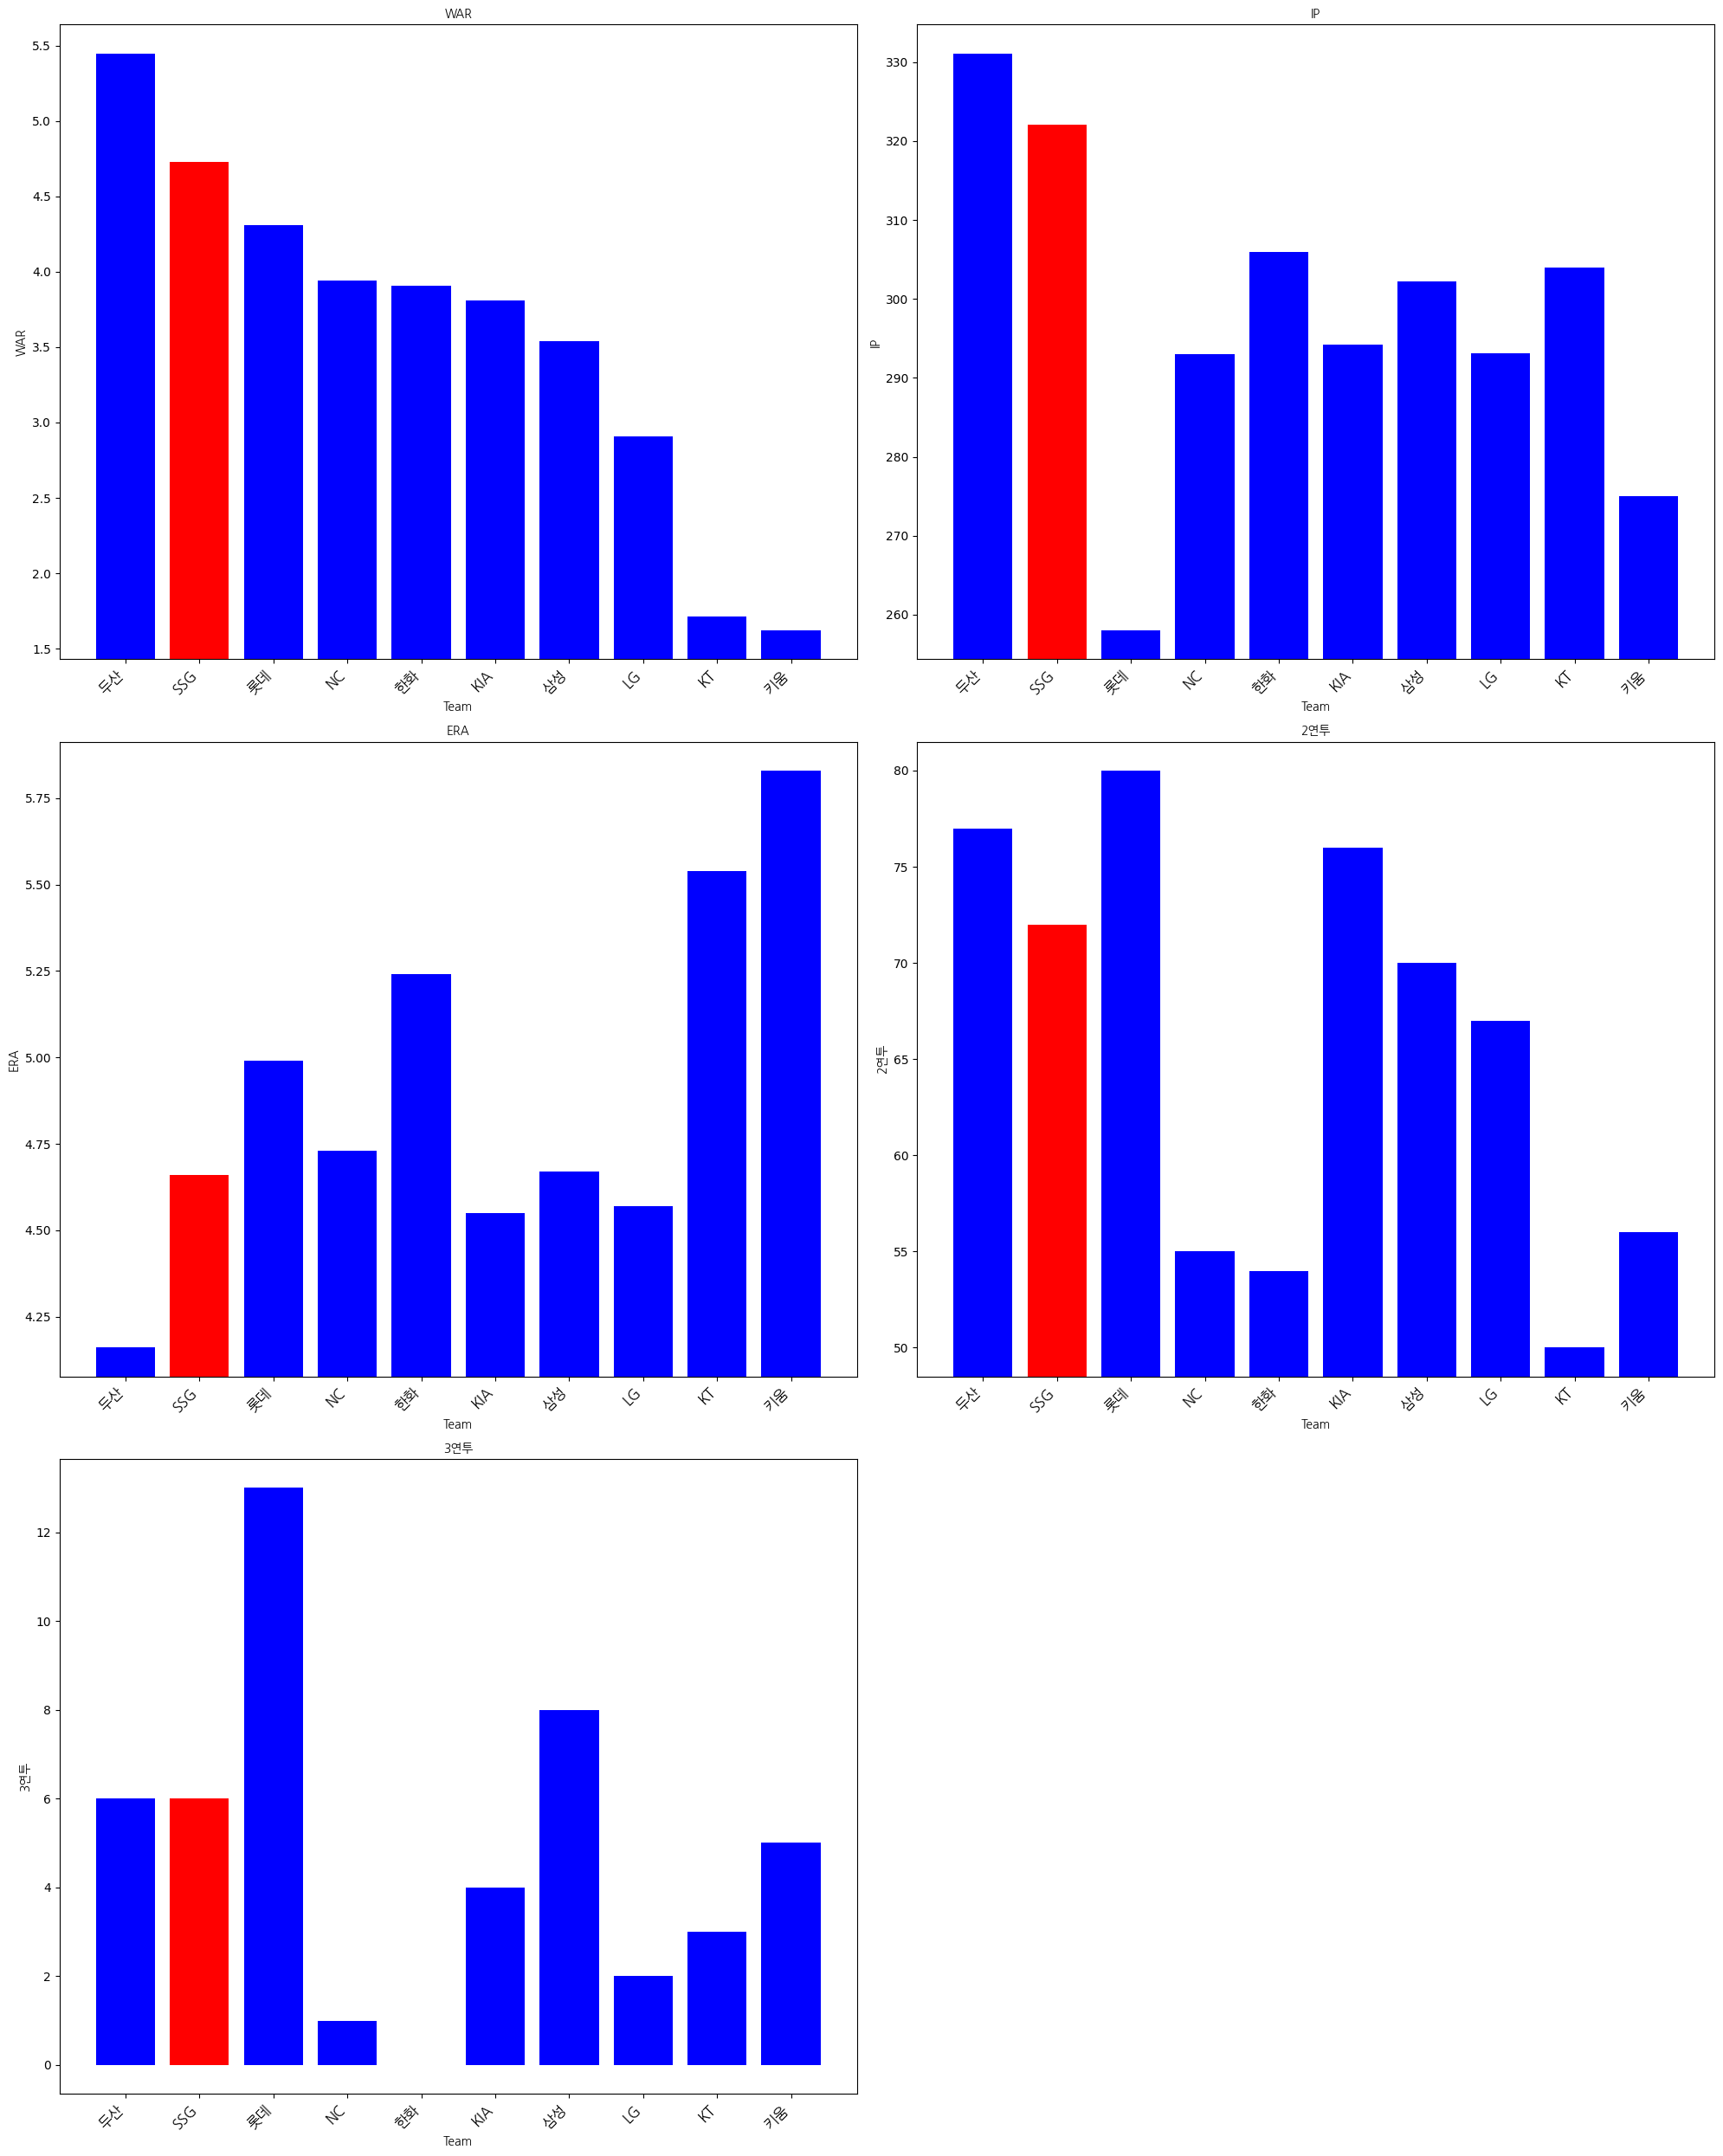

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로를 시스템에 맞게 설정
fontprop = fm.FontProperties(fname=font_path)

for column in selected_columns_pitching_middle.columns[1:]:
    selected_columns_pitching_middle[column] = selected_columns_pitching_middle[column].astype(float)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
columns = selected_columns_pitching_middle.columns[1:]  
for ax, column in zip(axes.flatten(), columns):
    colors = ['red' if team == 'SSG' else 'blue' for team in selected_columns_pitching_middle['Team']]
    ax.bar(selected_columns_pitching_middle['Team'], selected_columns_pitching_middle[column], color=colors)
    ax.set_title(column, fontproperties=fontprop)
    ax.set_xlabel('Team', fontproperties=fontprop)
    ax.set_ylabel(column, fontproperties=fontprop)
    ax.set_xticklabels(selected_columns_pitching_middle['Team'], rotation=45, ha='right', fontproperties=fontprop)
    ax.tick_params(axis='x', labelsize=12) 
    ax.set_ylim([selected_columns_pitching_middle[column].min() - 0.05 * (selected_columns_pitching_middle[column].max() - selected_columns_pitching_middle[column].min()), 
                 selected_columns_pitching_middle[column].max() + 0.05 * (selected_columns_pitching_middle[column].max() - selected_columns_pitching_middle[column].min())])

if len(columns) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

# FA 선발투수 분석

* 가장 시급한 것은 선발 투수의 영입으로 여겨집니다.
* 이번 FA 시장에 나온 선발 투수로는 최원태와 엄상백 두 명이 있습니다.
* 살펴볼 지표로는 선발 투수의 필수 덕목인 ERA와 이닝 수가 있습니다.
* 두 선수의 최근 3년간의 평균 기록을 살펴보았습니다.

       ERA          IP
name                  
엄상백   3.56  101.555556
최원태   4.21  131.888889


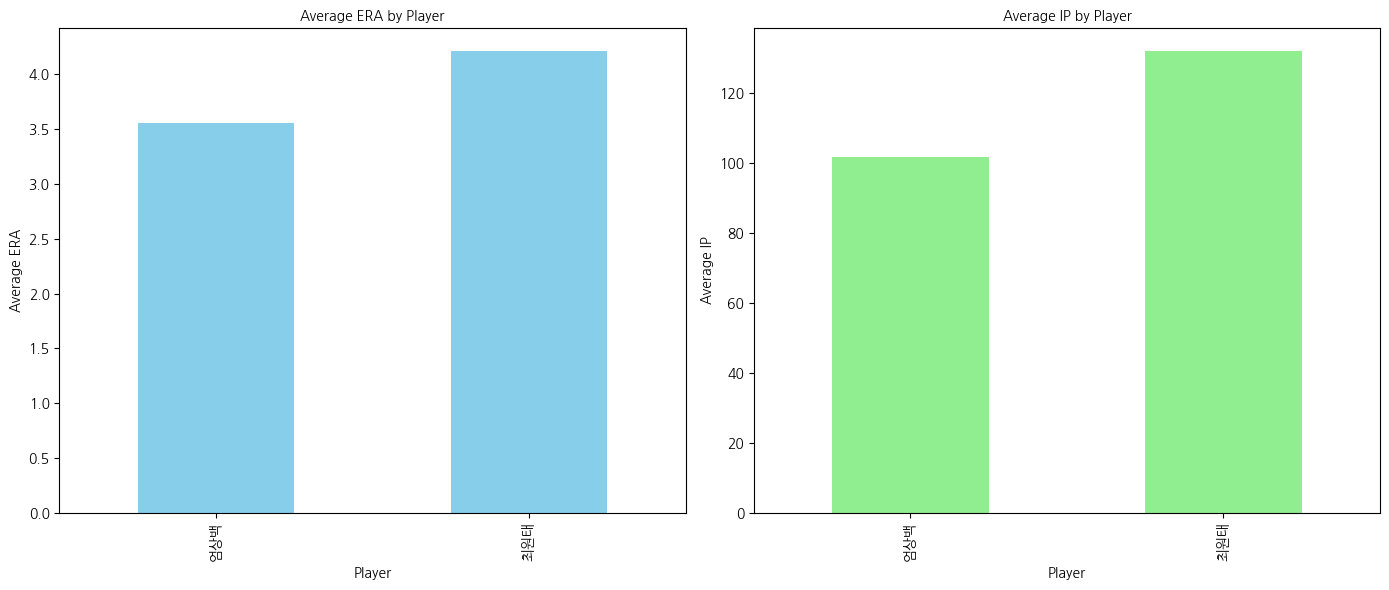

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로를 시스템에 맞게 설정
fontprop = fm.FontProperties(fname=font_path)

# matplotlib의 기본 설정을 사용하여 폰트 설정
plt.rcParams['font.family'] = fontprop.get_name()

# IP를 일관된 형식으로 변환하는 함수
def convert_ip(ip_str):
    if isinstance(ip_str, str):
        if ' ' in ip_str:
            ip_parts = ip_str.split(' ')
            innings = int(ip_parts[0])
            fraction = ip_parts[1].split('/')
            fractional_innings = int(fraction[0]) / int(fraction[1])
            return innings + fractional_innings
        else:
            return float(ip_str)
    return ip_str

# IP 컬럼 변환
selected_columns_df_FA_PITCHER_STARTING['IP'] = selected_columns_df_FA_PITCHER_STARTING['IP'].apply(convert_ip)

# ERA 컬럼을 float 형식으로 변환
selected_columns_df_FA_PITCHER_STARTING['ERA'] = selected_columns_df_FA_PITCHER_STARTING['ERA'].astype(float)

# 선수별로 각 컬럼의 평균 계산
averages = selected_columns_df_FA_PITCHER_STARTING.groupby('name').mean()

# 결과 출력
print(averages)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ERA 평균 시각화
averages['ERA'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Average ERA by Player', fontproperties=fontprop)
ax[0].set_ylabel('Average ERA', fontproperties=fontprop)
ax[0].set_xlabel('Player', fontproperties=fontprop)

# IP 평균 시각화
averages['IP'].plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Average IP by Player', fontproperties=fontprop)
ax[1].set_ylabel('Average IP', fontproperties=fontprop)
ax[1].set_xlabel('Player', fontproperties=fontprop)

plt.tight_layout()
plt.show()


* 두 선수 모두 훌륭한 선발 자원으로 생각됩니다.
* 평균 ERA는 엄상백 선수가 더 낮지만, 평균 이닝 수는 최원태 선수가 더 높습니다.
* 많은 이닝을 소화하여 불펜의 과부화를 막는 것이 급선무라고 생각되어 최원태 선수를 1순위로 영입하는 것이 최선의 선택이라고 생각합니다.